<center> <h1> Movie Recommender system : by Content-Based Filtering</h1></center> </br>
<h2>Deep Learning based Recommender System</h2></br>
Traditionally, recommender systems are based on methods such as clustering, nearest neighbor and matrix factorization. However, in recent years, deep learning has yielded tremendous success across multiple domains, from image recognition to natural language processing. Recommender systems have also benefited from deep learning's success. In fact, today's state-of-the-art recommender systems such as those at YouTube and Amazon are powered by complex deep learning systems, and less so on traditional methods.
<img src='images\MovieRecommender.jpg' align=center width="700" height="700">

<h2>Why this notebook?</h2></br>
While reading through the many useful notebooks here that covers the basics of recommender systems using traditional methods such as matrix factorization, I noticed that there is a lack of tutorials that cover deep learning based recommender systems.

#### Note:
this model is made from what I learn from Andrew Ng in course 3 in machine learning specialization

<h4>Ready ! :</h4>

* 📚 Libraries

* 📕 Load Data

* 🔍 EDA

* 🪚 Preprocessing

* 🏗️ Neural Network Trainning

* 📏 Prediction


### original Training data
https://www.kaggle.com/datasets/grouplens/movielens-20m-dataset </br>
These files contain 1,000,209 anonymous ratings of approximately 3,900 movies
made by 6,040 MovieLens users who joined MovieLens in 2000

## 📚 Libraries

In [112]:
import numpy as np
import numpy.ma as ma # for masking
import pandas as pd
import tensorflow as tf  # for Neural Network
from tensorflow import keras
from sklearn.preprocessing import StandardScaler, MinMaxScaler # for normalization & data preprocessing
from sklearn.model_selection import train_test_split # data splitting
import matplotlib.pyplot as plt # for visualization
import seaborn as sns #for color palette

### Already Engineered features
<b><span style="color : red;">Movie content :</span></b></br>
Movie release year <b>+</b> Movie's genre's(14 genres) <b>+</b> Average rating derived from user ratings</br>


<b><span style="color : red;">User content :</span></b></br> Rating made by the users for each genre. </br>


<b><span style="color : red;">The Target :</span></b></br> y, is the average rating for each user

## 📕 Load Data

In [113]:
item_names = ['movieid','year','ave rating','Action','Adventure','Animation','Children','Comedy','Crime', 'Documentary','Drama','Fantasy','Horror','Mystery','Romance','Sci-Fi','Thriller']
user_genres_names = ['userid','rating' 'count','rating' 'ave','Action','Adventure','Animation','Children','Comedy','Crime','Documentary','Drama','Fantasy','Horror','Mystery','Romance','Sci-Fi','Thriller']

In [114]:
item_features = pd.read_csv('./data/content_item_train.csv', names = item_names)
item_features.head()

,movieid,year,ave rating,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Horror,Mystery,Romance,Sci-Fi,Thriller
0,6874,2003,4.0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
1,8798,2004,3.8,1,0,0,0,0,1,0,1,0,0,0,0,0,1
2,46970,2006,3.2,1,0,0,0,1,0,0,0,0,0,0,0,0,0
3,48516,2006,4.3,0,0,0,0,0,1,0,1,0,0,0,0,0,1
4,58559,2008,4.2,1,0,0,0,0,1,0,1,0,0,0,0,0,0


<b><span style="color : red;">Item Features :</span></b></br>
Movie release year <b>+</b> Movie's genre's(14 genres) <b>+</b> Average rating derived from user ratings</br>

In [115]:
user_features = pd.read_csv('./data/content_user_train.csv', names = user_genres_names)
user_features.head()

,userid,ratingcount,ratingave,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Horror,Mystery,Romance,Sci-Fi,Thriller
0,2.0,22.0,4.0,4.0,4.2,0.0,0.0,4.0,4.1,4.0,4.0,0.0,3.0,4.0,0.0,3.9,3.9
1,2.0,22.0,4.0,4.0,4.2,0.0,0.0,4.0,4.1,4.0,4.0,0.0,3.0,4.0,0.0,3.9,3.9
2,2.0,22.0,4.0,4.0,4.2,0.0,0.0,4.0,4.1,4.0,4.0,0.0,3.0,4.0,0.0,3.9,3.9
3,2.0,22.0,4.0,4.0,4.2,0.0,0.0,4.0,4.1,4.0,4.0,0.0,3.0,4.0,0.0,3.9,3.9
4,2.0,22.0,4.0,4.0,4.2,0.0,0.0,4.0,4.1,4.0,4.0,0.0,3.0,4.0,0.0,3.9,3.9


<b><span style="color : red;">User Features :</span></b></br> Rating made by the users for each genre. </br></br>
<pre>
NOTICE :1- Some ratings are repeated to boost the number of training examples of underrepresented genre's.
        2- user id, rating count & rating average are available but not included in the training or prediction content.
        carried with dataset because they are useful in interpreting data.
</pre>

In [116]:
y_UserAvgRating = pd.read_csv('./data/content_y_train.csv', names = ["avg_rating"])
y_UserAvgRating.head()

,avg_rating
0,4.0
1,3.5
2,4.0
3,4.0
4,4.5


<b><span style="color : red;">The Target :</span></b></br> y, is the average rating for each user

## 🔍 Exploratory Data Analysis

Types & memory:

In [117]:
item_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50884 entries, 0 to 50883
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   movieid      50884 non-null  int64  
 1   year         50884 non-null  int64  
 2   ave rating   50884 non-null  float64
 3   Action       50884 non-null  int64  
 4   Adventure    50884 non-null  int64  
 5   Animation    50884 non-null  int64  
 6   Children     50884 non-null  int64  
 7   Comedy       50884 non-null  int64  
 8   Crime        50884 non-null  int64  
 9   Documentary  50884 non-null  int64  
 10  Drama        50884 non-null  int64  
 11  Fantasy      50884 non-null  int64  
 12  Horror       50884 non-null  int64  
 13  Mystery      50884 non-null  int64  
 14  Romance      50884 non-null  int64  
 15  Sci-Fi       50884 non-null  int64  
 16  Thriller     50884 non-null  int64  
dtypes: float64(1), int64(16)
memory usage: 6.6 MB


In [118]:
user_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50884 entries, 0 to 50883
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userid       50884 non-null  float64
 1   ratingcount  50884 non-null  float64
 2   ratingave    50884 non-null  float64
 3   Action       50884 non-null  float64
 4   Adventure    50884 non-null  float64
 5   Animation    50884 non-null  float64
 6   Children     50884 non-null  float64
 7   Comedy       50884 non-null  float64
 8   Crime        50884 non-null  float64
 9   Documentary  50884 non-null  float64
 10  Drama        50884 non-null  float64
 11  Fantasy      50884 non-null  float64
 12  Horror       50884 non-null  float64
 13  Mystery      50884 non-null  float64
 14  Romance      50884 non-null  float64
 15  Sci-Fi       50884 non-null  float64
 16  Thriller     50884 non-null  float64
dtypes: float64(17)
memory usage: 6.6 MB


⭕ feedback: No objects need to be handled + memory usage is 6.6 MB...great!😀

Shapes

In [119]:
print(item_features.shape)
print(user_features.shape)
print(y_UserAvgRating.shape)

(50884, 17)
(50884, 17)
(50884, 1)


⭕ feedback: equality of rows will be useful in neural network training...great!😀

🧮Statstical informations

In [120]:
item_features.describe()

,movieid,year,ave rating,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Horror,Mystery,Romance,Sci-Fi,Thriller
count,50884.0,50884.0,50884.0,50884.0,50884.0,50884.0,50884.0,50884.0,50884.0,50884.0,50884.0,50884.0,50884.0,50884.0,50884.0,50884.0,50884.0
mean,39901.5,2005.8,3.6,0.3,0.3,0.2,0.2,0.4,0.2,0.1,0.3,0.2,0.1,0.2,0.1,0.2,0.3
std,37778.6,4.0,0.4,0.5,0.5,0.4,0.4,0.5,0.4,0.3,0.5,0.4,0.3,0.4,0.3,0.4,0.5
min,4054.0,2001.0,1.9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,6218.0,2002.0,3.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,33004.0,2005.0,3.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,66097.0,2009.0,3.9,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
max,187593.0,2018.0,4.3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [121]:
user_features.describe()

,userid,ratingcount,ratingave,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Horror,Mystery,Romance,Sci-Fi,Thriller
count,50884.0,50884.0,50884.0,50884.0,50884.0,50884.0,50884.0,50884.0,50884.0,50884.0,50884.0,50884.0,50884.0,50884.0,50884.0,50884.0,50884.0
mean,320.9,189.6,3.6,3.5,3.5,3.5,3.4,3.5,3.6,2.3,3.7,3.5,2.9,3.6,3.5,3.5,3.5
std,177.9,153.7,0.5,0.6,0.6,0.9,1.0,0.6,0.7,1.9,0.5,0.7,1.3,0.8,0.7,0.7,0.6
min,2.0,1.0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,177.0,70.0,3.3,3.2,3.3,3.5,3.2,3.2,3.4,0.0,3.4,3.3,2.6,3.2,3.3,3.1,3.2
50%,318.0,149.0,3.6,3.5,3.6,3.8,3.6,3.5,3.7,3.3,3.8,3.6,3.2,3.8,3.6,3.6,3.6
75%,475.0,262.0,3.9,3.8,3.8,4.0,3.9,3.8,4.0,4.0,4.0,3.9,3.8,4.0,3.9,3.9,3.9
max,610.0,615.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0,5.0


😨 What about NaN values?

In [122]:
user_features.isnull().sum()

userid         0
ratingcount    0
ratingave      0
Action         0
Adventure      0
Animation      0
Children       0
Comedy         0
Crime          0
Documentary    0
Drama          0
Fantasy        0
Horror         0
Mystery        0
Romance        0
Sci-Fi         0
Thriller       0
dtype: int64

In [123]:
item_features.isnull().sum()

movieid        0
year           0
ave rating     0
Action         0
Adventure      0
Animation      0
Children       0
Comedy         0
Crime          0
Documentary    0
Drama          0
Fantasy        0
Horror         0
Mystery        0
Romance        0
Sci-Fi         0
Thriller       0
dtype: int64

⭕ feedback: No none values...great!😀

😱 is it balanced data?

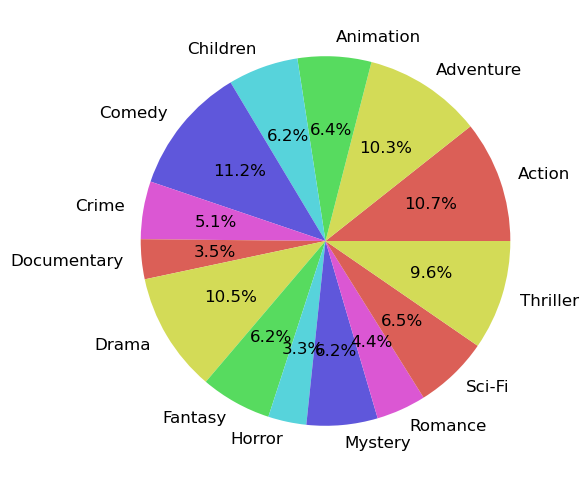

In [124]:
fig = plt.figure(1, figsize=(6,6))

slices = list(item_features.sum()[3:])
label =user_genres_names[3:]

plt.pie(slices, labels=label, 
        autopct='%1.1f%%', colors= sns.color_palette("hls"),
        labeldistance = 1.1, textprops={'fontsize': 12})

plt.show()

⭕ feedback: Data is almost Balanced...great!😀


## 🪚 Preprocessing the data
 We'll scale the target ratings using a MinMax Scaler to be between -1 and 1.

In [125]:
item_features = np.array(item_features)
user_features = np.array(user_features)
y_UserAvgRating = np.array(y_UserAvgRating)

In [126]:
#---------scalling-item-features--Mean-normalization------------
scalerItem = StandardScaler()
scalerItem.fit(item_features)
item_features = scalerItem.transform(item_features)

In [127]:
#--------scalling-user-features-using--Mean-normalization-------
scalerUser = StandardScaler()
scalerUser.fit(user_features)
user_train = scalerUser.transform(user_features)

In [128]:
#--------scalling-average-ratings-using--MinMax-normalization---
scalerTarget = MinMaxScaler()
scalerTarget.fit(y_UserAvgRating)
y_UserAvgRating = scalerTarget.transform(y_UserAvgRating)

The scaled, shuffled data now has a mean of zero.

<h2>Train-Test Split</h2>

<img src='images/tts.png' align=left width='700'>

In [129]:
#splitting item features
item_train, item_test = train_test_split(item_features,   train_size=0.80, shuffle=True, random_state=1) 
#splitting user features
user_train, user_test = train_test_split(user_features,   train_size=0.80, shuffle=True, random_state=1)
#splitting real results
y_train, y_test       = train_test_split(y_UserAvgRating, train_size=0.80, shuffle=True, random_state=1)

<a name="4"></a>
## Neural Network for content-based filtering
Now, let's construct a neural network as described in the figure above. 


<h3> Concept : Content-based filtering</h3>

Content-based filtering generates user & movie feature vector has average ratings & other information available about the user and/or movie that may improve the prediction. Informations is provided to a neural network to generates the user and movie vector.
<figure>
    <img src="./images/RecSysNN.png" align=center  style="width:500px;height:280px;" >
</figure>


 

In [130]:
num_outputs = 32
tf.random.set_seed(1)

num_user_features = user_features.shape[1] - 3  # remove userid, rating count and ave rating during training
num_item_features = item_features.shape[1] - 1  # remove movie id during training
# Neural Network Architecture

# User Network 
user_NN = tf.keras.models.Sequential([ 
    tf.keras.layers.Dense(units = 256, activation = 'relu'),
    tf.keras.layers.Dense(units = 128, activation = 'relu'),
    tf.keras.layers.Dense(units = 32, activation = 'linear')
])

# Item Network
item_NN = tf.keras.models.Sequential([
    tf.keras.layers.Dense(units = 256, activation = 'relu'),
    tf.keras.layers.Dense(units = 128, activation = 'relu'),
    tf.keras.layers.Dense(units = 32, activation = 'linear')
])


# put input shape for "UserNetwork" + normalization tehnique 
input_user = tf.keras.layers.Input(shape=(num_user_features))
vu = user_NN(input_user)
vu = tf.linalg.l2_normalize(vu, axis=1)

# put input shape for "ItemNetwork" + normalization tehnique 
input_item = tf.keras.layers.Input(shape=(num_item_features))
vm = item_NN(input_item)
vm = tf.linalg.l2_normalize(vm, axis=1)

# compute dot product of the two vectors vu and vm --> predicted rate
output = tf.keras.layers.Dot(axes=1)([vu, vm])

# specify the inputs and output of the model
model = tf.keras.Model([input_user, input_item], output)

model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 14)]         0           []                               
                                                                                                  
 input_10 (InputLayer)          [(None, 16)]         0           []                               
                                                                                                  
 sequential_6 (Sequential)      (None, 32)           40864       ['input_9[0][0]']                
                                                                                                  
 sequential_7 (Sequential)      (None, 32)           41376       ['input_10[0][0]']               
                                                                                            

We will use a mean squared error loss and an Adam optimizer.

In [131]:
tf.random.set_seed(1)

#Cost_function --> MeanSquaredError
cost_fn = tf.keras.losses.MeanSquaredError()

#GradientDescentType --> Adam
opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer=opt, loss=cost_fn)

## Neural Network Trainning

In [ ]:
tf.random.set_seed(1)
history = model.fit([np.array(user_train)[:, 3:], np.array(item_train)[:, 1:]], y_train, epochs=30)

Epoch 1/30
1273/1273 [==============================] - 5s 3ms/step - loss: 0.0373
Epoch 2/30
1273/1273 [==============================] - 3s 3ms/step - loss: 0.0315
Epoch 3/30
1273/1273 [==============================] - 3s 3ms/step - loss: 0.0304
Epoch 4/30
1273/1273 [==============================] - 3s 3ms/step - loss: 0.0296
Epoch 5/30
1273/1273 [==============================] - 3s 2ms/step - loss: 0.0290
Epoch 6/30
1273/1273 [==============================] - 3s 2ms/step - loss: 0.0288
Epoch 7/30
1273/1273 [==============================] - 3s 3ms/step - loss: 0.0286
Epoch 8/30
1273/1273 [==============================] - 3s 2ms/step - loss: 0.0282
Epoch 9/30
1273/1273 [==============================] - 3s 2ms/step - loss: 0.0281
Epoch 10/30
1273/1273 [==============================] - 3s 2ms/step - loss: 0.0278
Epoch 11/30
1273/1273 [==============================] - 3s 2ms/step - loss: 0.0273
Epoch 12/30
1273/1273 [==============================] - 3s 3ms/step - loss: 0.0269
E

Evaluate the model to determine loss on the test data. 

In [ ]:
model.evaluate([np.array(user_test)[:, 3:], np.array(item_test)[:, 1:]], y_test)

It is comparable to the training loss indicating the model has <b>not overfit the training data</b>.

## Predictions for a new user : Try
Change user content to match your own preferences & see what the model suggests.</br>
Note : <b>ratings are between 0.5 and 5.0</b>.

In [ ]:
item_vecs = pd.read_csv('./data/content_item_vecs.csv')
item_vecs = np.array(item_vecs)

movie_list = pd.read_csv('./data/content_movie_list.csv')
movie_dict = {row['movieId']: {'title': row['title'], 'genres': row['genres']} for _, row in movie_list.iterrows()}

In [ ]:
def print_pred_movies(y_p, item, movie_dict, maxcount=10):
    # Create a DataFrame to hold the results
    columns = ["y_p", "movie id", "rating ave", "title", "genres"]
    results = pd.DataFrame(columns=columns)

    for i in range(min(maxcount, y_p.shape[0])):
        movie_id = int(item[i, 0])
        row = {
            "y_p": round(y_p[i, 0], 1),
            "movie id": movie_id,
            "rating ave": round(float(item[i, 2]), 1),
            "title": movie_dict[movie_id]['title'],
            "genres": movie_dict[movie_id]['genres']
        }
        results = results.append(row, ignore_index=True)

    return results

<b>Enter average rating for each genre based on your prefrences </b>

In [ ]:

new_user_id = 5003
new_rating_ave = 0.0
#-----enter-here--------
new_action = 0.0
new_adventure = 0.0
new_animation = 0.0
new_childrens = 0.0
new_comedy = 0.0
new_crime = 0.5
new_documentary = 0.0
new_drama = 0.0
new_fantasy = 0.0
new_horror = 5.0
new_mystery = 1.0
new_romance = 0.0
new_scifi = 0.0
new_thriller = 0.0
#-----------------------
new_rating_count = 3

user_vec = np.array([[new_user_id, new_rating_count, new_rating_ave,
                      new_action, new_adventure, new_animation, new_childrens,
                      new_comedy, new_crime, new_documentary,
                      new_drama, new_fantasy, new_horror, new_mystery,
                      new_romance, new_scifi, new_thriller]])



#--------------------------Don't-touch-anyCode-below-------------------------------------

#Find the top-rated movies for the new user.

# Generate UserVector
user_vecs = np.tile(user_vec, (len(item_vecs), 1))

# Scale UserVector
suser_vecs = scalerUser.transform(user_vecs)
# Scale ItemVector
sitem_vecs = scalerItem.transform(item_vecs)

# Make Prediction
y_p = model.predict([suser_vecs[:, 3:], sitem_vecs[:, 1:]])

# unscale y prediction 
y_pu = scalerTarget.inverse_transform(y_p)

# Result Sorting
sorted_index = np.argsort(-y_pu,axis=0).reshape(-1).tolist()  #largest rating first
sorted_ypu   = y_pu[sorted_index]
sorted_items = item_vecs[sorted_index]  #using unscaled vectors for display

print_pred_movies(sorted_ypu, sorted_items, movie_dict, maxcount = 10)

The model prediction is generally not very accurate predictor of how a user rates specific movies.</br>
This is especially true if the user rating is significantly different than the user's genre average.

<a name="5.3"></a>
## Finding Similar Items
The neural network produces 2 feature vectors, a user feature vector $v_u$, and a movie feature vector, $v_m$.</br>
These are 32 entry vectors whose values are difficult to interpret. However, similar items will have similar vectors. This information can be used to make recommendations. For example, if a user has rated "Toy Story 3" highly, one could recommend similar movies by selecting movies with similar movie feature vectors.

A similarity measure is the squared distance between the two vectors $ \mathbf{v_m^{(k)}}$ and $\mathbf{v_m^{(i)}}$ :
$$\left\Vert \mathbf{v_m^{(k)}} - \mathbf{v_m^{(i)}}  \right\Vert^2 = \sum_{l=1}^{n}(v_{m_l}^{(k)} - v_{m_l}^{(i)})^2\$$

In [ ]:
input_item_m = tf.keras.layers.Input(shape=(num_item_features))    # input layer
vm_m = item_NN(input_item_m)                                       # use the trained item_NN
vm_m = tf.linalg.l2_normalize(vm_m, axis=1)                        # incorporate normalization as was done in the original model
model_m = tf.keras.Model(input_item_m, vm_m)                                
model_m.summary()

Once we have a movie model, we can create a set of movie feature vectors using the model to predict using a set of item/movie vectors as input.`item_vecs` is a set of all of the movie vectors. must be scaled to use with the trained model. The result of the prediction is a 32 entry feature vector for each movie.

In [ ]:
scaled_item_vecs = scalerItem.transform(item_vecs)
vms = model_m.predict(scaled_item_vecs[:,1:])
print(f"size of all predicted movie feature vectors: {vms.shape}")

Finally, compute a matrix of the squared distance between each movie feature vector and all other movie feature vectors:
<figure>
    <left> <img src="./images/distmatrix.PNG"   style="width:400px;height:225px;" ></center>
</figure>

We can then find the closest movie by finding the minimum along each row. We will make use of `ma.masked_array` to avoid selecting the same movie. The masked values along the diagonal won't be included in the computation.

In [ ]:
def sq_dist(a, b):
    d = sum(np.square(a-b))   
    return d

In [ ]:
count = 50  # number of movies to display
dim = len(vms)
dist = np.zeros((dim,dim))

for i in range(dim):
    for j in range(dim):
        dist[i,j] = sq_dist(vms[i, :], vms[j, :])
        
m_dist = ma.masked_array(dist, mask=np.identity(dist.shape[0]))  # mask the diagonal

disp = [["movie1", "genres", "movie2", "genres"]]
for i in range(count):
    min_idx = np.argmin(m_dist[i])
    movie1_id = int(item_vecs[i,0])
    movie2_id = int(item_vecs[min_idx,0])
    disp.append( [movie_dict[movie1_id]['title'], movie_dict[movie1_id]['genres'],
                  movie_dict[movie2_id]['title'], movie_dict[movie1_id]['genres']]
               )
table = tabulate.tabulate(disp, tablefmt='html', headers="firstrow")
table

The results show the model will generally suggest a movie with similar genre's.

## so glad you got this far 😃❤️